In [19]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=2)

In [20]:
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass', 'width', 'height', 'color_score']]
y_fruits = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X_fruits,y_fruits,random_state=0)
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
scores = []

In [21]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train)
scores.append(clf.score(X_test, y_test))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on training set: 0.47


C:\Users\aq062\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
from sklearn.svm import SVC

clf = SVC(kernel='linear').fit(X_train, y_train)
scores.append(clf.score(X_test, y_test))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on training set: 0.60


In [23]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
scores.append(clf.score(X_test, y_test))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on training set: 0.87


In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
scores.append(clf.score(X_test, y_test))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on training set: 0.87


In [25]:
scores

[0.4666666666666667, 0.6, 0.8666666666666667, 0.8666666666666667]

<IPython.core.display.Javascript object>


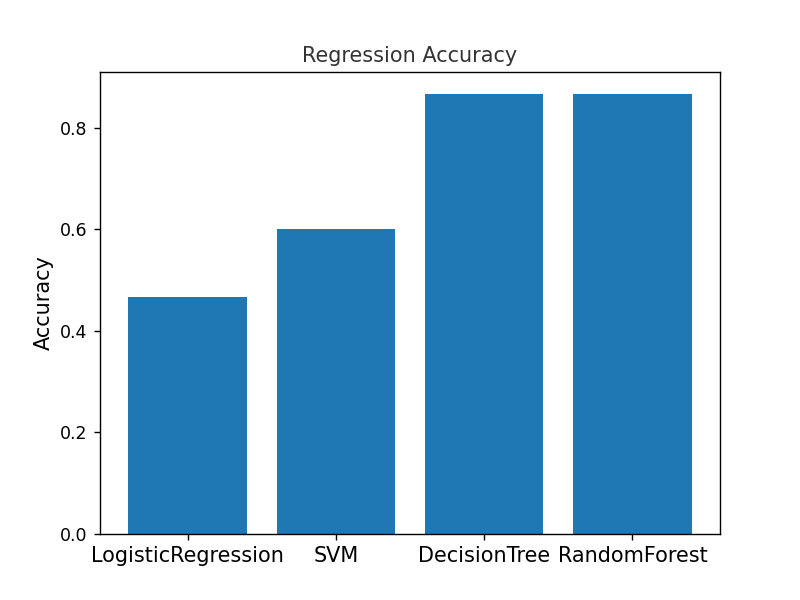

Text(0.5, 1.0, 'Regression Accuracy')

In [26]:
# 1.모델의 테스트셋 성능비교
plt.figure()

reg =['LogisticRegression', 'SVM', 'DecisionTree', 'RandomForest']
pos = np.arange(len(reg))
plt.bar(pos, scores, align='center')
plt.xticks(pos, reg, fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Regression Accuracy', alpha=0.8)

In [27]:
#2. 성능이 제일좋은 RandomForest에서 예측
clf = RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
fruit_prediction = clf.predict([[120,6,8,0.7]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'